In [2]:
#import packages
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import folium
import mapclassify
import imageio

In [6]:
#data profiling
gdf.head()

,ICECODE,CT,CA,CB,CC,SA,SB,SC,SO,SD,FA,FB,FC,FP,FS,POLY_TYPE,Shape_Leng,Shape_Area,geometry
0,CT00CA-9-9-9CB-9-9-9CC-9-9-9CF-9-9CN-9CD-9,00,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,W,1.726485e+07,5.177708e+11,"POLYGON ((-4999426.262 -2648453.882, -4995247...."
1,CT00CA-9-9-9CB-9-9-9CC-9-9-9CF-9-9CN-9CD-9,00,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,W,3.784632e+05,1.969818e+09,"POLYGON ((-1308537.169 -228830.113, -1307217.7..."
2,CT00CA-9-9-9CB-9-9-9CC-9-9-9CF-9-9CN-9CD-9,00,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,W,4.888103e+05,3.119246e+09,"POLYGON ((1633230.773 -163896.886, 1627275.987..."
3,CT00CA-9-9-9CB-9-9-9CC-9-9-9CF-9-9CN-9CD-9,00,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,W,5.232513e+05,2.586744e+09,"POLYGON ((-1344950.565 -136276, -1343428.873 -..."
4,CT00CA-9-9-9CB-9-9-9CC-9-9-9CF-9-9CN-9CD-9,00,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,W,3.058837e+05,1.277234e+09,"POLYGON ((-1300410.343 -89744.35, -1301145.952..."


In [18]:
#data profiling

unique_values = gdf['POLY_TYPE'].unique()
print(unique_values) 

['W' 'I']


<Axes: >

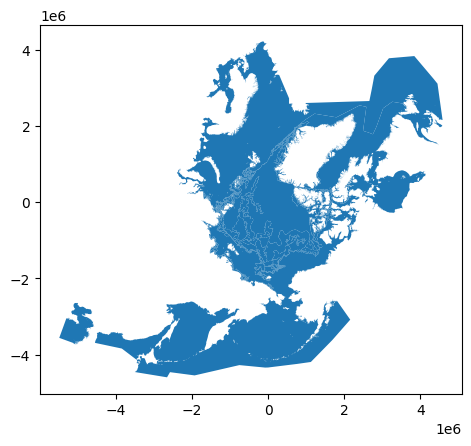

In [13]:
#plot file 
path = r"C:\Users\zachz\OneDrive\Documents\Geo\Arctic\ARCTIC231020.shp"
gdf = gpd.read_file(path) 
gdf.plot()

<Axes: >

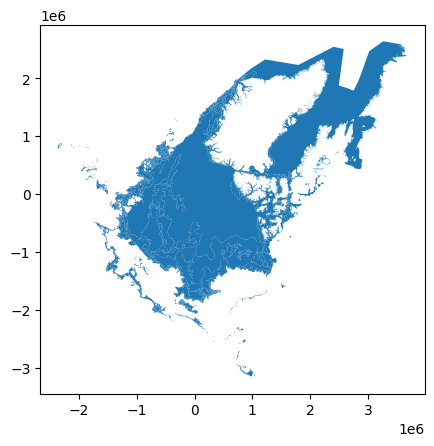

In [3]:
#filter and display ice polygons
#CT always 0 for W
boundary_column = "POLY_TYPE"  # Example column name
desired_type = "I"         # Example value to filter
ice_gdf = gdf[gdf[boundary_column] == desired_type]
ice_gdf.plot()

<Axes: >

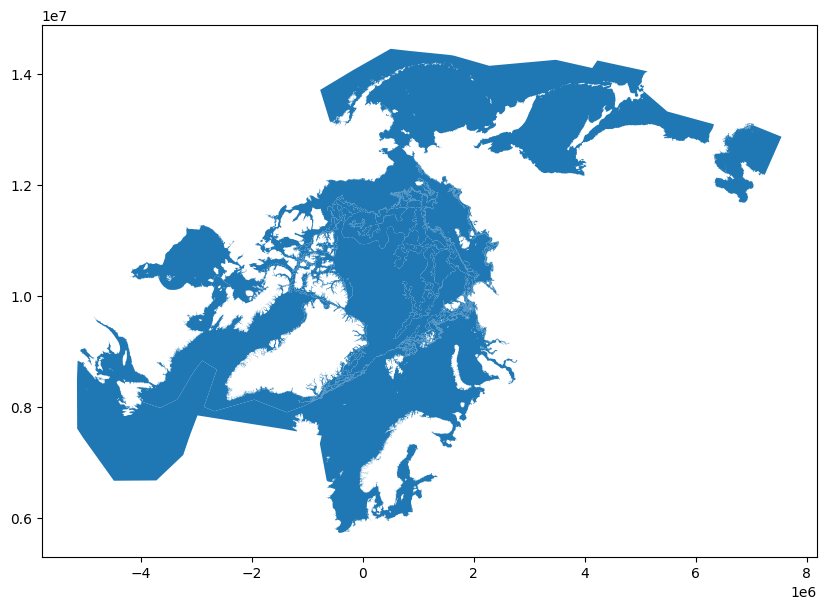

In [11]:
#stadnarize data to Polar Stereographic projection for the Arctic Analysis
gdf = gdf.to_crs("EPSG:32633")


fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax)

#Pivot the axes (transpose X and Y)
#ax.set_aspect(1)  # Ensure equal scaling for both axes
#ax.invert_yaxis()  # Invert Y-axis (optional for better perspective)
#ax.invert_xaxis()


In [ ]:
#show the overlay 
overlay = ice_gdf.overlay(land_overlay, how='difference')



In [ ]:
overlay.plot()

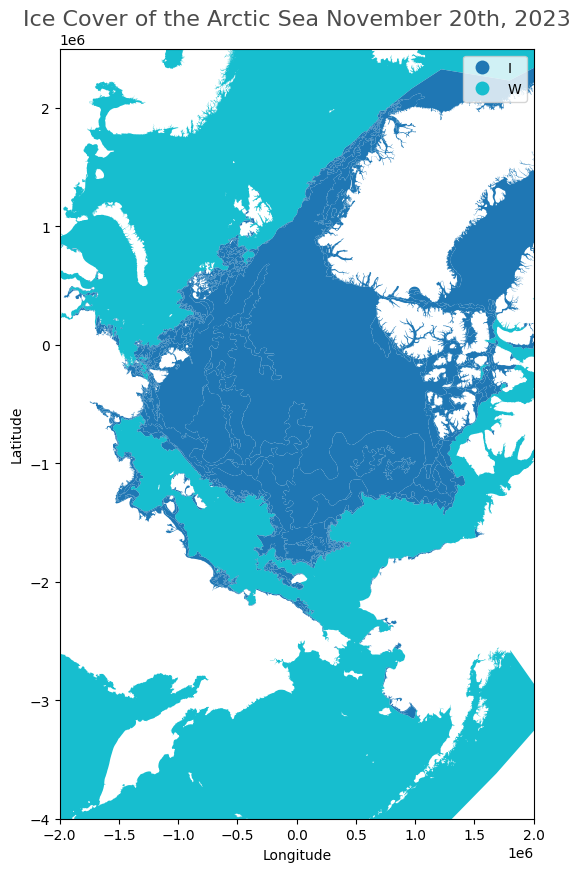

In [14]:
date_title = "November 20th, 2023"
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, column="POLY_TYPE", legend=True) ##, color='lightblue')##, ,  edgecolor='yellow'
ax.set_title("Ice Cover of the Arctic Sea "+ date_title,  fontsize=16, alpha=0.7)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
#ax.set_axis_off()  # Remove axis for better aesthetics

zoom_extent = (-2000000, 2000000, -4000000, 2500000)    # Adjust these based on your CRS and area of interest

# Set the zoomed-in extent
ax.set_xlim(zoom_extent[0], zoom_extent[1])
ax.set_ylim(zoom_extent[2], zoom_extent[3])

# Show the map
plt.show()

In [59]:
#testing date logic for title
dates = [
    "October 20th, 2023",
                "October 27th, 2023",
                "November 2nd, 2023",
                "November 9th, 2023",
                "November 17th, 2023",
                "November 24th, 2023",
                "December 8th, 2023",
                "December 15th, 2023",
                "December 22nd, 2023",
                "December 29th, 2023",
                "January, 5th, 2024",
                "January, 12th, 2024",
                 "January, 19th, 2024",
                 "January, 26th, 2024",
                 "February, 2nd, 2024",
                  "February, 9th, 2024",
                  "February, 16th, 2024",
                  "February, 23rd, 2024",
              "March 8th, 2024",
              "March 15th, 2nd, 2024"]
time_order = [
    "ARCTIC231020.shp",
    "ARCTIC231027.shp",
    "ARCTIC231102.shp",
    "ARCTIC231109.shp",
    "ARCTIC231117.shp",
    "ARCTIC231124.shp",
    "ARCTIC231208.shp",
    "ARCTIC231215.shp",
    "ARCTIC231222.shp",
    "ARCTIC231229.shp",
    "ARCTIC240105.shp",
    "ARCTIC240112.shp",
    "ARCTIC240119.shp",
    "ARCTIC240126.shp",
    "ARCTIC240202.shp",
    "ARCTIC240209.shp",
    "ARCTIC240216.shp",
    "ARCTIC240223.shp",
    "ARCTIC240308.shp",
    "ARCTIC240315.shp"]

print(len(time_order))

20


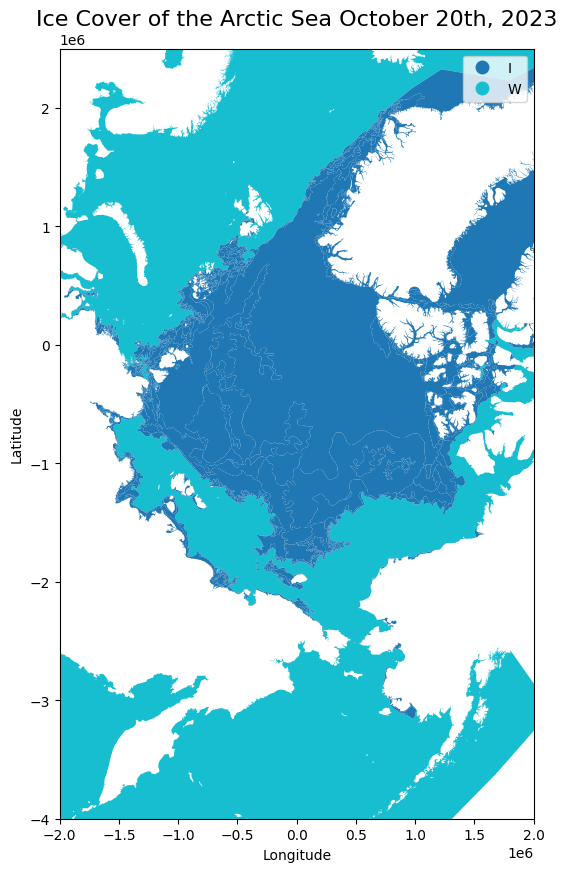

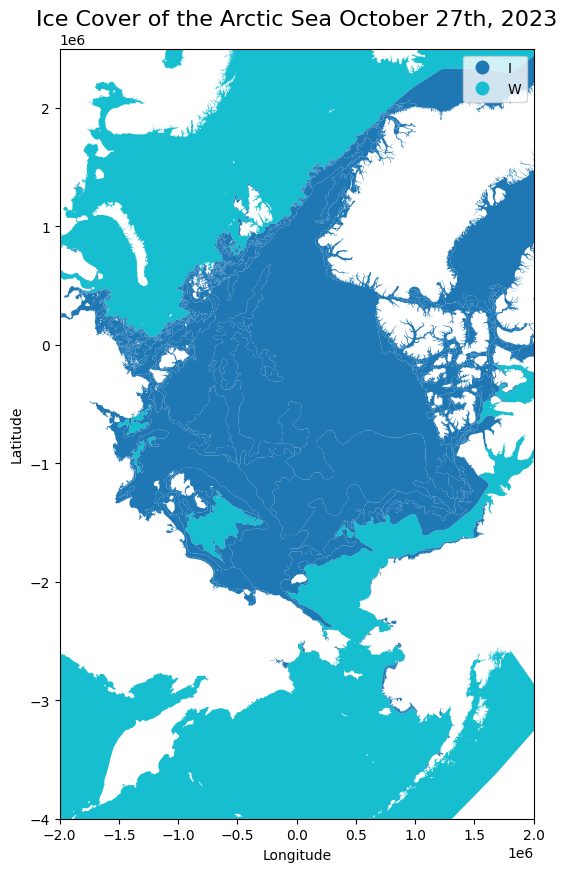

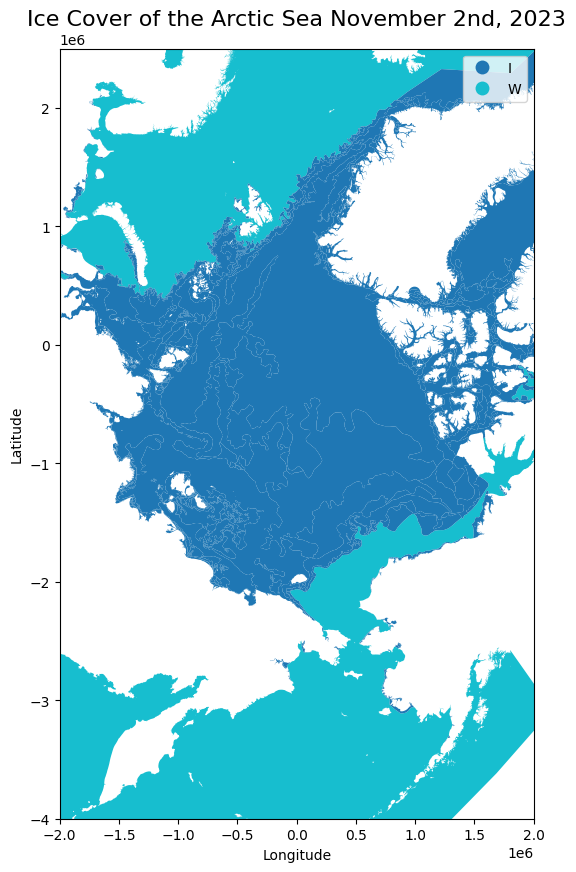

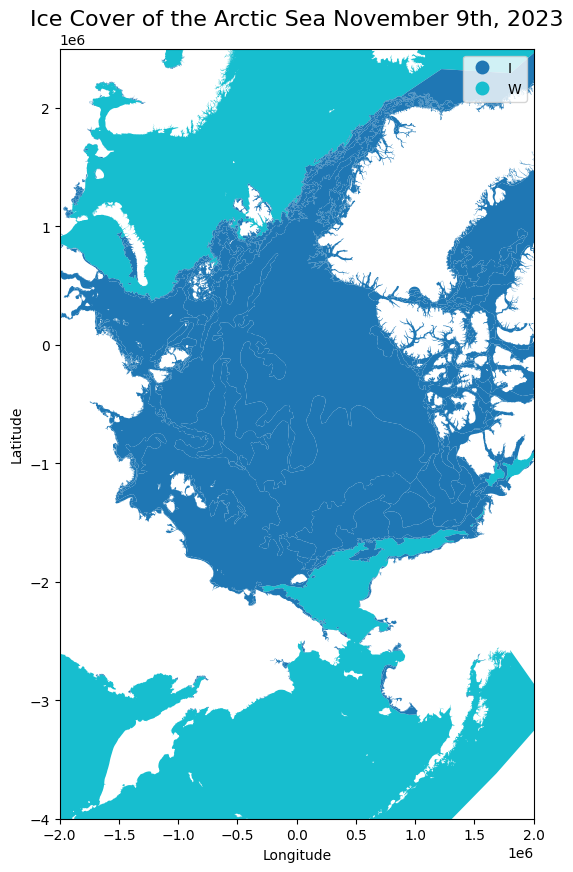

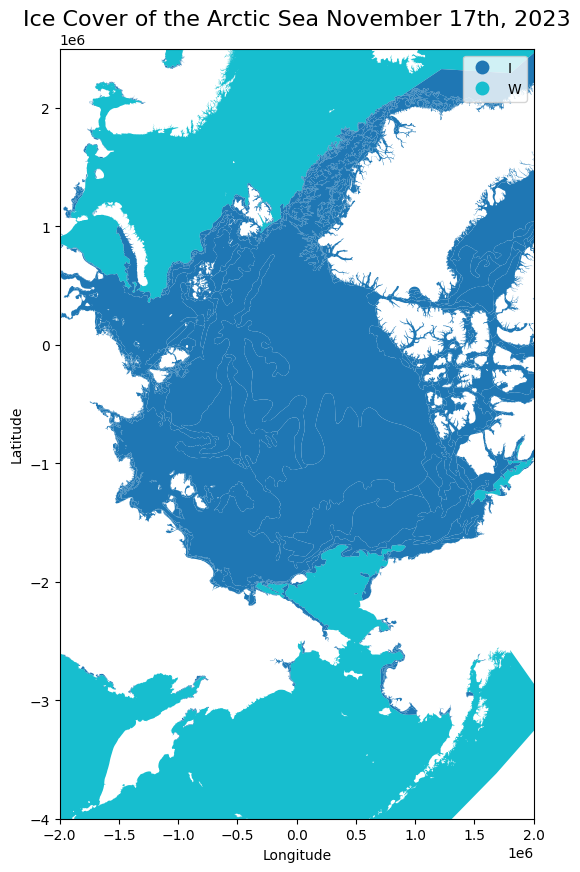

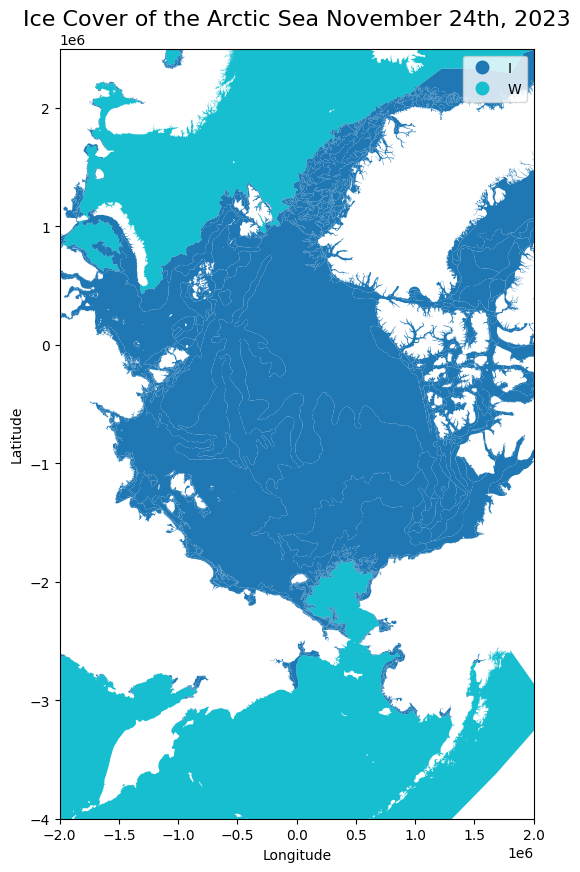

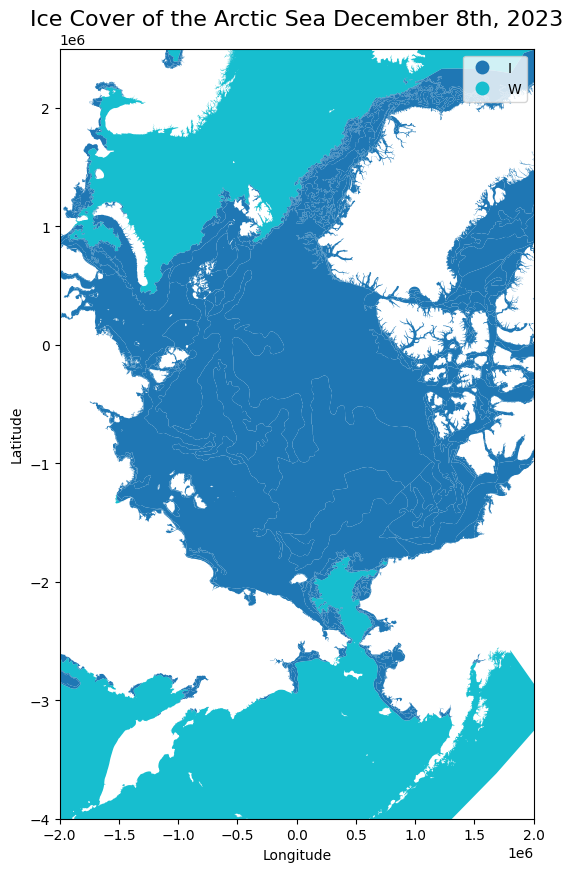

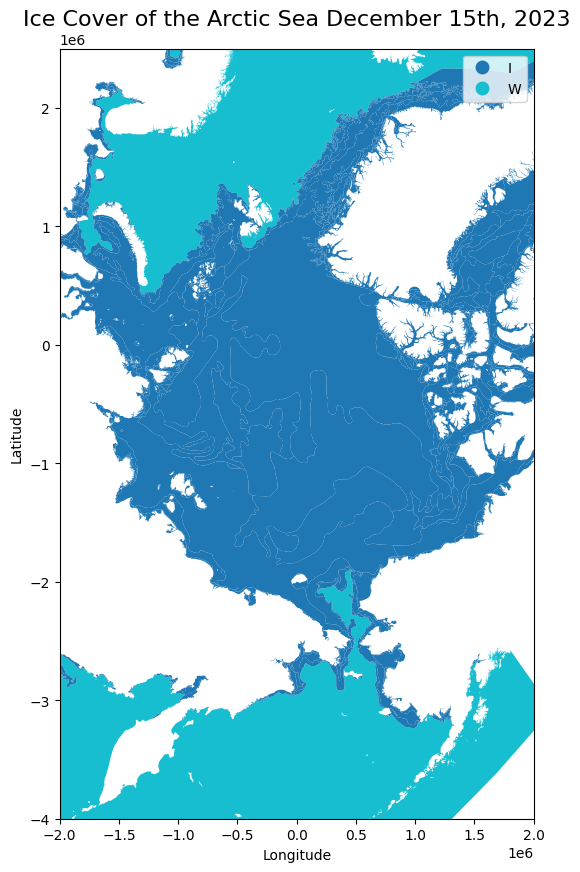

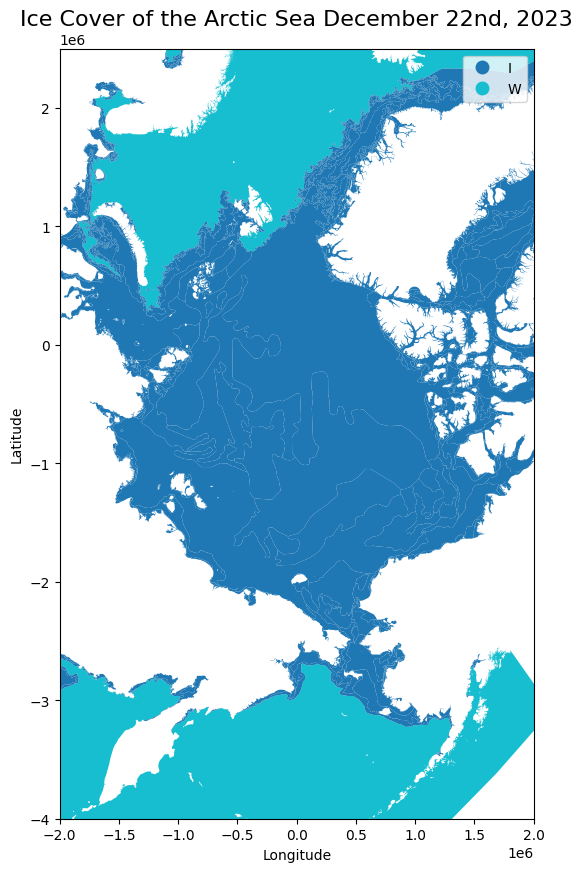

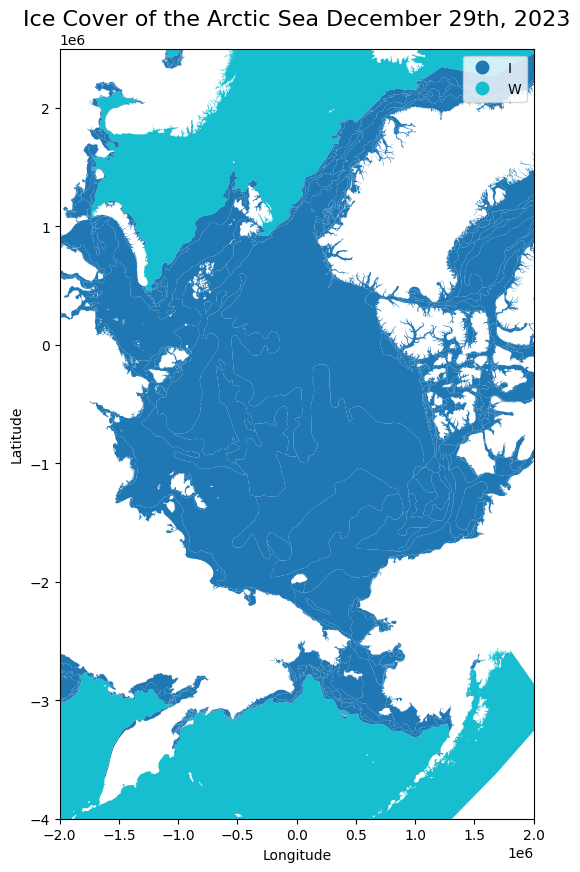

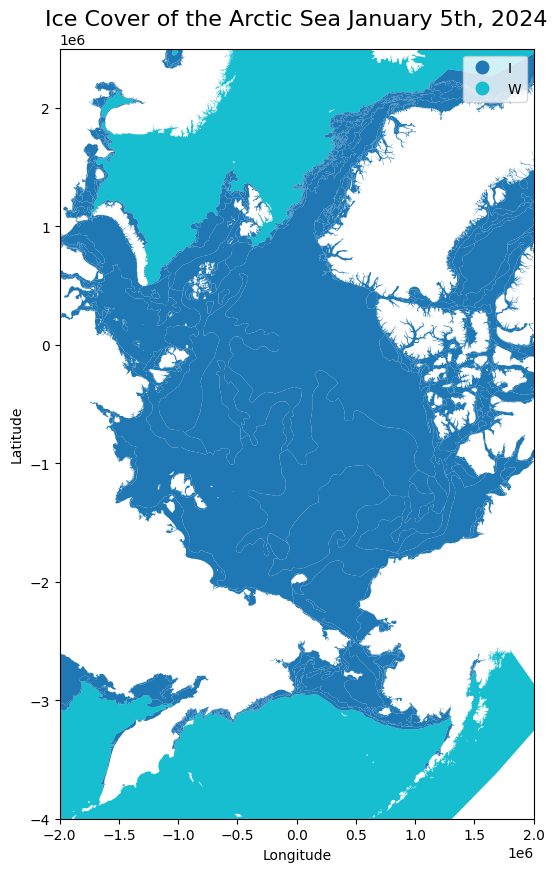

KeyboardInterrupt: 

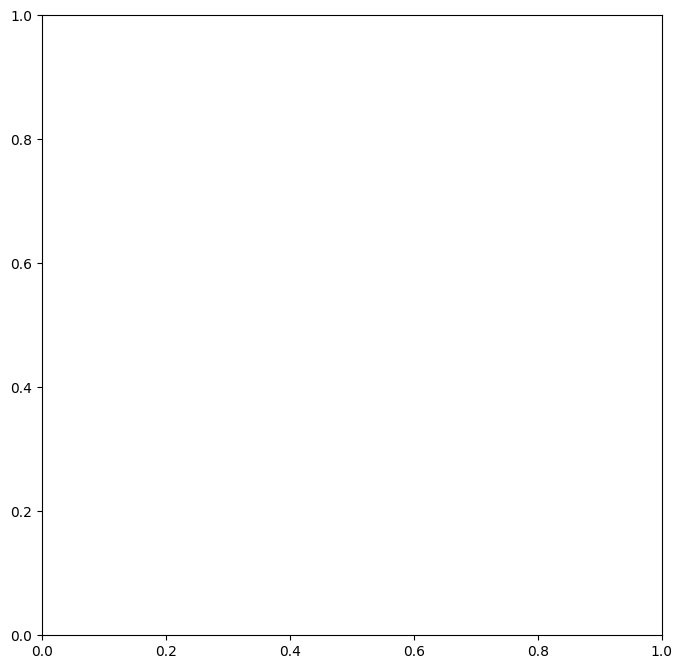

In [16]:
#
import geopandas as gpd
import matplotlib.pyplot as plt
import os

dates = [
    "October 20th, 2023",
    "October 27th, 2023",
    "November 2nd, 2023",
    "November 9th, 2023",
    "November 17th, 2023",
    "November 24th, 2023",
    "December 8th, 2023",
    "December 15th, 2023",
    "December 22nd, 2023",
    "December 29th, 2023",
    "January 5th, 2024",
    "January 12th, 2024",
     "January 19th, 2024",
    "January 26th, 2024",
    "February 2nd, 2024",
     "February 9th, 2024",
    "February 16th, 2024",
    "February 23rd, 2024",
    "March 8th, 2024",
    "March 15th, 2024",
    "March 22nd, 2024",
    "March 29th, 2024",
    "April 5th, 2024",
    "April 12th, 2024",
    "April 19th, 2024",
    "April 25th, 2024",
    "May 2nd, 2024",
    "May 10th, 2024",
    "May 16th, 2024",
    "May 24th, 2024",
    "May 30th, 2024",
    "June 6th, 2024",
    "June 14th, 2024",
    "June 21st, 2024"]



def plot_timelapse(directory, time_order, output_gif=None):
  
    frames = []  # Store frames for creating a GIF 

    x = 0 # Set incremental counter for date title
    
    for filename in time_order:
        # Build full path to the shapefile
        shapefile_path = os.path.join(directory, filename)

        #loop thorugh shp file dates for title 
        
        date_title = dates[x]
        x=x+1
        
        # Load the shapefile
        gdf = gpd.read_file(shapefile_path)
        
        # Plot the shapefile
        fig, ax = plt.subplots(figsize=(8, 10))
        gdf.plot(ax=ax, column="POLY_TYPE", legend=True) ##, color='lightblue')##, ,  edgecolor='yellow'
        ax.set_title("Ice Cover of the Arctic Sea "+ date_title,  fontsize=16)
        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")
        #ax.set_axis_off()
        
        # Adjust these based on your CRS and area of interest
        zoom_extent = (-2000000, 2000000, -4000000, 2500000)
        # Set the zoomed-in extent
        ax.set_xlim(zoom_extent[0], zoom_extent[1])
        ax.set_ylim(zoom_extent[2], zoom_extent[3])
        
        # Save frame for GIF (optional)
        if output_gif:
            plt.savefig(f"{filename}.png")
            frames.append(f"{filename}.png")
        
        # Display the plot
        plt.show()
        plt.close()
    
   #Create a GIF
    if output_gif:
        images = [imageio.imread(frame) for frame in frames]
        imageio.mimsave(output_gif, images, loop=4, fps=1)  # Adjust fps for animation speed
        
        # Clean up temporary images
        for frame in frames:
            os.remove(frame)

# run the function
directory = r"C:\Users\zachz\OneDrive\Documents\Geo\Arctic"  # Directory containing shapeLMfiles
time_order = [
    "ARCTIC231020.shp",
    "ARCTIC231027.shp",
    "ARCTIC231102.shp",
    "ARCTIC231109.shp",
    "ARCTIC231117.shp",
    "ARCTIC231124.shp",
    "ARCTIC231208.shp",
    "ARCTIC231215.shp",
    "ARCTIC231222.shp",
    "ARCTIC231229.shp",
    "ARCTIC240105.shp",
    "ARCTIC240112.shp",
    "ARCTIC240119.shp",
    "ARCTIC240126.shp",
    "ARCTIC240202.shp",
    "ARCTIC240209.shp",
    "ARCTIC240216.shp",
    "ARCTIC240223.shp",
    "ARCTIC240308.shp",
    "ARCTIC240315.shp",
    "ARCTIC240322.shp",
    "ARCTIC240329.shp",
    "ARCTIC240405.shp",
    "ARCTIC240412.shp",
    "ARCTIC240419.shp",
    "ARCTIC240425.shp",
    "ARCTIC240502.shp",
    "ARCTIC240510.shp",
    "ARCTIC240516.shp",
    "ARCTIC240524.shp",
    "ARCTIC240530.shp",
    "ARCTIC240607.shp",
    "ARCTIC240614.shp",
    "ARCTIC240621.shp"]
  # List of shapefiles in chronological order
output_gif = r"C:\Users\zachz\OneDrive\Documents\Geo\Ice_timelapse.gif"  # Optional GIF output

plot_timelapse(directory, time_order, output_gif)


In [51]:
#interatcive code
m = gdf.explore(
    column="POLY_TYPE",  # make choropleth based on "POP2010" column
    #scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
    legend=True,  # show legend
    k=2,  # use 10 bins
    tooltip=False,  # hide tooltip
    #popup=["ICE", "WATER"],  # show popup (on-click)
    legend_kwds=dict(colorbar=False),  # do not use colorbar
    name="ICE_CODE",  # name of the layer in the map
)

#m